In [1]:
import numpy as np

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from importlib import reload
from random import choice
reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')
print(durak_game.trump_suit)

Hearts


In [4]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing Deck: --- Card Collection ---
Cards: D0,D1,D4,D6,C2,C5,H1,H3,H8,S0,S5,S6.
Size: 12
-----------------------

Player 0:[[0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1]]
Player 1:[[1 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
Player 2:[[0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 0]]
Player 3:[[0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 0 0 0]]
Trump suit is Hearts
---------------------



In [17]:
p_att_idx = durak_game.playing_field.players_on_attack[0]
possibleAttacks = [i for i,v in np.ndenumerate(durak_game.playing_field.get_legal_moves(p_att_idx)) if v == 1]
print('Attacker:', durak_game.getDeckFromHand(durak_game.players[p_att_idx].hand))

Attacker: --- Card Collection ---
Cards: D3,D8,C1,H4,S1,S3.
Size: 6
-----------------------



In [6]:
possibleAttacks

[(0, 4), (1, 1), (2, 3), (2, 8), (3, 1), (3, 3)]

In [18]:
p_def_idx = durak_game.playing_field.player_on_defense
print('Defender:',durak_game.getDeckFromHand(durak_game.players[p_def_idx].hand))

Defender: --- Card Collection ---
Cards: D5,C7,C8,H7,S7,S8.
Size: 6
-----------------------



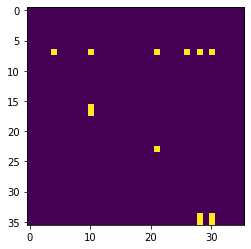

In [19]:
durak_game.playing_field.attacks[possibleAttacks[0]] = 1
durak_game.playing_field.attacks[possibleAttacks[1]] = 1
durak_game.playing_field.attacks[possibleAttacks[2]] = 1
durak_game.playing_field.attacks[possibleAttacks[3]] = 1
durak_game.playing_field.attacks[possibleAttacks[4]] = 1
durak_game.playing_field.attacks[possibleAttacks[5]] = 1
plt.imshow(durak_game.playing_field.get_legal_moves(p_def_idx))

In [20]:
attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
nontrump_attack_idxs = attack_idxs[attack_idxs >= durak_game.deck.n_vals]

In [21]:
from math import ceil
valid_defenses = np.zeros_like(durak_game.playing_field.field)
f = lambda x : (x // durak_game.deck.n_vals + 1)*durak_game.deck.n_vals

In [22]:
for att_idx in attack_idxs:
    valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1

for att_idx in nontrump_attack_idxs:
    valid_defenses[:durak_game.deck.n_vals, att_idx] = 1

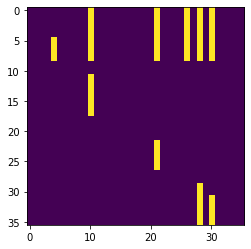

In [23]:
plt.imshow(valid_defenses)